In [1]:
import bruno as br
import numpy as np

In [2]:
d = np.random.normal(0, 10, 30)
y = np.random.normal(0, 15, 30)

In [3]:
y

array([-23.3498266 ,  17.8521358 ,  -5.2776118 ,  -2.91130057,
       -38.85613174, -14.58751689,  11.93487469,   3.43886513,
        -6.80882255,  11.5826068 ,  24.69938357,  14.56259929,
       -21.33617892,   8.64175197,  11.83286167, -25.04779367,
         3.3746423 , -18.40283092,  -3.19564719, -16.82347825,
       -12.08757081,  -8.33402004, -31.78382614,  23.02342368,
         8.62422029,   2.34267385,  -0.56689669, -28.11134072,
        15.16625022,   0.51558868])

In [4]:
print(d)

[ 11.72472132  -5.72947362 -10.2727692   16.01890812  -1.03222303
   6.13956068   3.32958992  -4.35822743  -5.27508033  -7.38687428
  -6.73874283  -4.69106125  -5.72017982   0.12087599 -21.69148982
  -5.39706332 -10.44011265   2.61934578  -8.36517614  12.27148055
  10.75273892  -1.02649393  -1.68346367   4.16712981  -5.84747814
  10.1568065   -0.26492881  -0.28480149   3.59672022  -1.44776949]


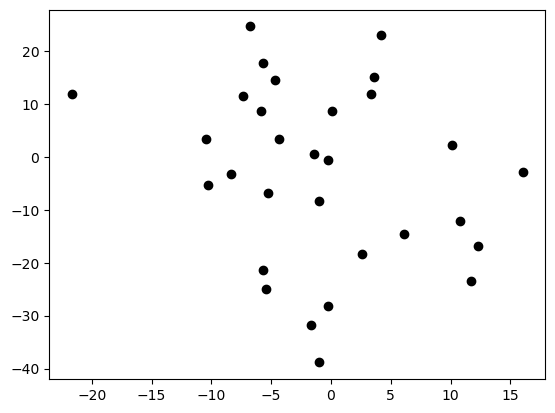

In [23]:
import matplotlib.pyplot as plt
s = np.array(d)
plt.plot(s, y, 'ok')
plt.show()

### Ajustando uma reta com o modelo y = $ \alpha$ x + $\beta$

In [24]:
one = np.ones(30)

In [25]:
A = np.vstack([d, one])

In [26]:
A = A.T

In [27]:
print(A)

[[ 11.72472132   1.        ]
 [ -5.72947362   1.        ]
 [-10.2727692    1.        ]
 [ 16.01890812   1.        ]
 [ -1.03222303   1.        ]
 [  6.13956068   1.        ]
 [  3.32958992   1.        ]
 [ -4.35822743   1.        ]
 [ -5.27508033   1.        ]
 [ -7.38687428   1.        ]
 [ -6.73874283   1.        ]
 [ -4.69106125   1.        ]
 [ -5.72017982   1.        ]
 [  0.12087599   1.        ]
 [-21.69148982   1.        ]
 [ -5.39706332   1.        ]
 [-10.44011265   1.        ]
 [  2.61934578   1.        ]
 [ -8.36517614   1.        ]
 [ 12.27148055   1.        ]
 [ 10.75273892   1.        ]
 [ -1.02649393   1.        ]
 [ -1.68346367   1.        ]
 [  4.16712981   1.        ]
 [ -5.84747814   1.        ]
 [ 10.1568065    1.        ]
 [ -0.26492881   1.        ]
 [ -0.28480149   1.        ]
 [  3.59672022   1.        ]
 [ -1.44776949   1.        ]]


In [28]:

p = br.minimos_quadrados(A, y)

In [29]:
print(p)

[-0.51174223 -3.78602836]


In [30]:
f = np.linspace(-15, 30, 50)

In [31]:
model_line = p[0]*f + p[1]

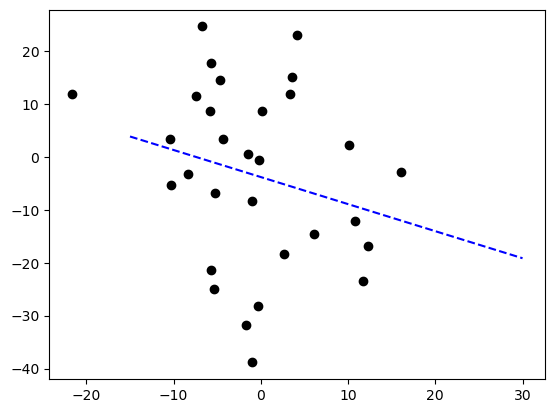

In [32]:
plt.plot(s, y, 'ok')
plt.plot(f, model_line, 'b--')
plt.show()

In [33]:
residuo = br.residuo(A, p, y)

In [34]:
br.Estatisticas(residuo).desvio_padrao

array([50.80057904, 34.66562217, 47.39299408, 39.48255765, 61.81786519,
       47.84850547, 35.30630003, 41.52139521, 46.87983523, 38.22446763,
       31.50024112, 36.04469069, 54.25740151, 37.7738786 , 41.75947813,
       56.03053271, 43.10968538, 50.6568838 , 45.86391381, 47.39750497,
       45.41815336, 46.55534343, 58.44834606, 29.54772327, 39.30977387,
       38.35551293, 42.47691924, 56.2542261 , 33.62226134, 42.23833132])

In [35]:
br.Estatisticas(residuo).variancia

array([2580.69883073, 1201.70536039, 2246.09588771, 1558.87235895,
       3821.44845679, 2289.47947547, 1246.53482174, 1724.0262601 ,
       2197.7189508 , 1461.10992532,  992.26519076, 1299.21972719,
       2943.86561914, 1426.86590469, 1743.85401328, 3139.42059589,
       1858.44497372, 2566.119876  , 2103.49858953, 2246.52347757,
       2062.80865504, 2167.40000171, 3416.20915679,  873.06795048,
       1545.25832199, 1471.14537212, 1804.28866775, 3164.53795363,
       1130.45645757, 1784.07663231])

In [73]:
from scipy.stats import norm
media = br.Estatisticas(residuo).media
desvio_padrao = np.mean(br.Estatisticas(residuo).desvio_padrao)
x = np.linspace(-50, 200, 300)
p = norm.pdf(x, media, desvio_padrao)

# Plotar a curva gaussiana sobre o histograma

plt.hist(residuo, bins = 5, density=True, alpha=0.6, color='g')
plt.plot(x, p.T, 'k', linewidth=2)

In [75]:
desvio_padrao

44.01869744418023

In [74]:
media

array([37.23681585, 53.37177272, 40.64440081, 48.55483723, 26.2195297 ,
       40.18888942, 52.73109486, 46.51599968, 41.15755966, 49.81292726,
       56.53715377, 51.99270419, 33.77999337, 50.26351629, 46.27791676,
       32.00686218, 44.92770951, 37.38051109, 42.17348108, 40.63988992,
       42.61924152, 41.48205146, 29.58904883, 58.48967162, 48.72762101,
       49.68188196, 45.56047565, 31.78316879, 54.41513355, 45.79906357])